[View in Colaboratory](https://colab.research.google.com/github/gregorydillon/awsjupyternotebooks/blob/master/bakMissing_Trees_in_311_reports_0B32pCCISawTmd1B1R1dsaVlnSDdzb0RnSVZlcXVWNTd1NWRJPQ.ipynb)

#Missing Trees in 311 reports
(used a copy of monthly graffiti as a starting document)

Constructing custom queries to conserve bandwith and computational resources

[Socrata Developer Reference page](https://dev.socrata.com/docs/functions/date_trunc_ymd.html)

## Setup

In [0]:
import os
!pip install sodapy -q
from sodapy import Socrata
import pandas as pd
from IPython.display import Image, display
import time



## Pulling from the Cannonical official 311 requests database
the data is from the SF311 cannonical source
https://data.sfgov.org/City-Infrastructure/311-Cases/vw6y-z8j6
and its json
https://data.sfgov.org/resource/ktji-gk7t.json
base url:    data.sfgov.org
resource id: ktji-gk7t

In [0]:
socrata_domain = 'data.sfgov.org'
socrata_dataset_identifier = 'ktji-gk7t'


# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
! export SODAPY_APPTOKEN="YKXgUQm8NQwtM1xZ2vL5ZJFXu"
socrata_token = os.environ.get("SODAPY_APPTOKEN")
socrata_token = "YKXgUQm8NQwtM1xZ2vL5ZJFXu"


In [0]:
client = Socrata(socrata_domain, socrata_token)

## A big automation jump would be to scape for the latlong

####SoQL query for private reports within so many meters of a report

## Added string interpolation into 3X """

2017-11-10T07:28:37.000


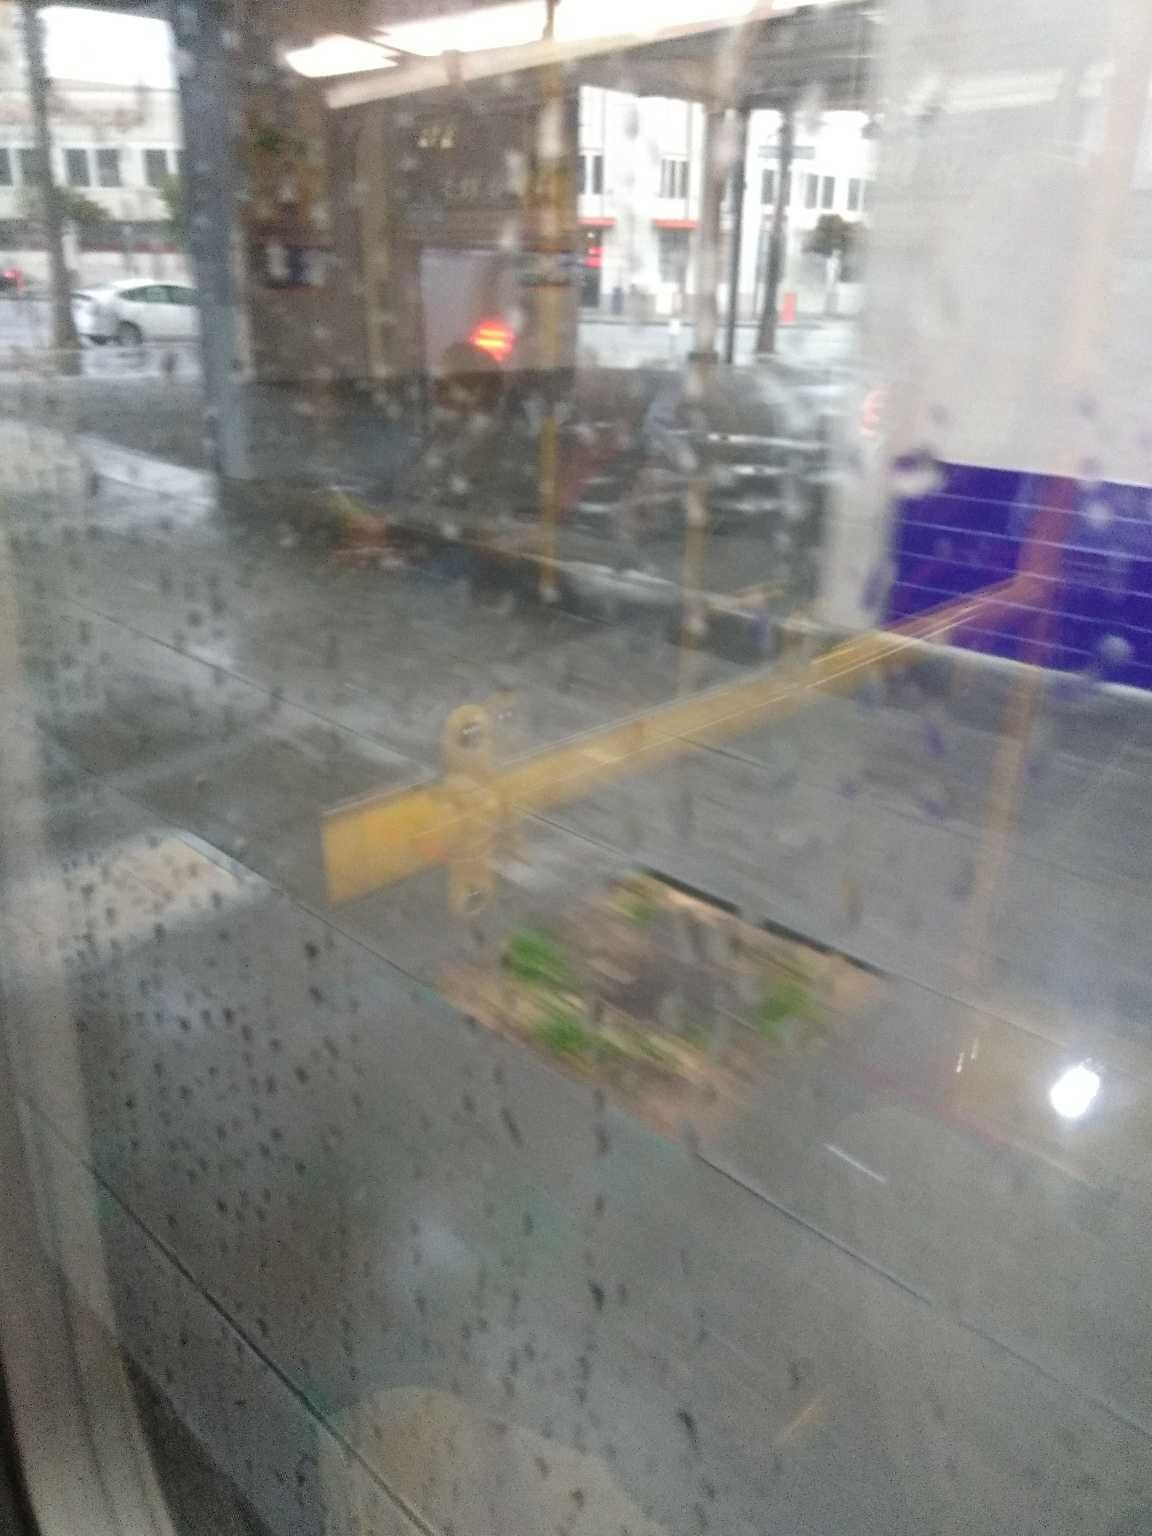

2017-09-21T10:57:18.000


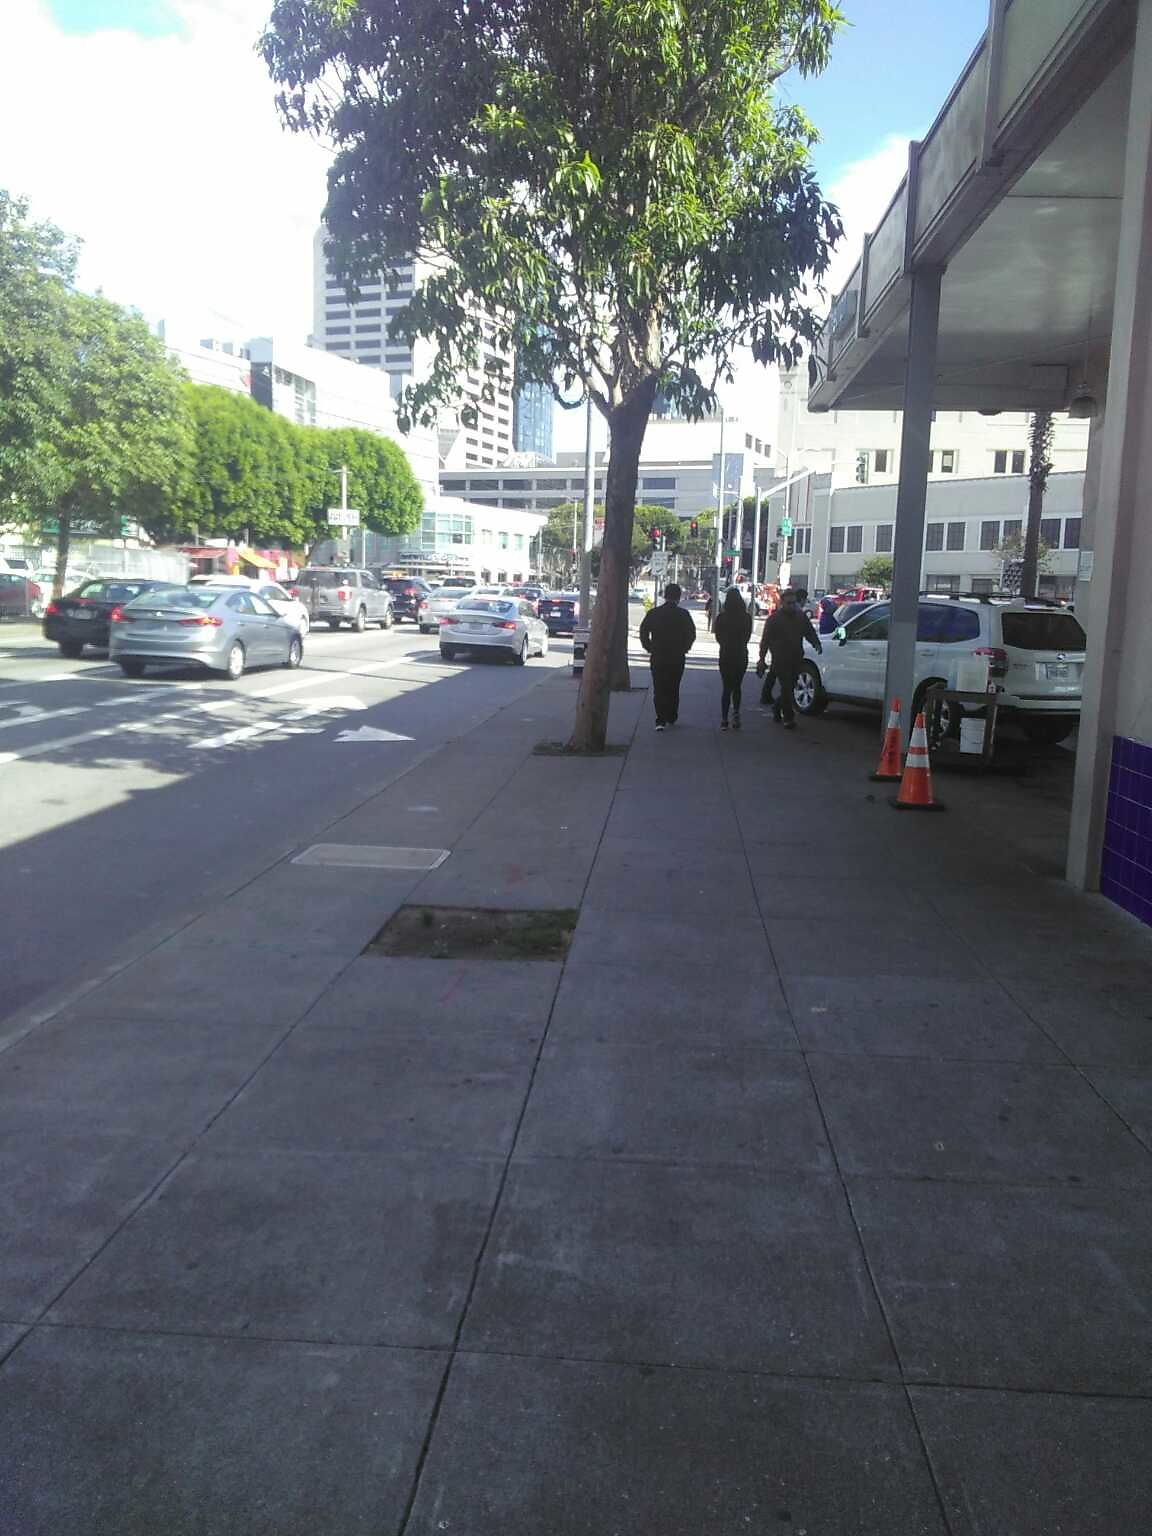

2017-07-26T09:09:23.000


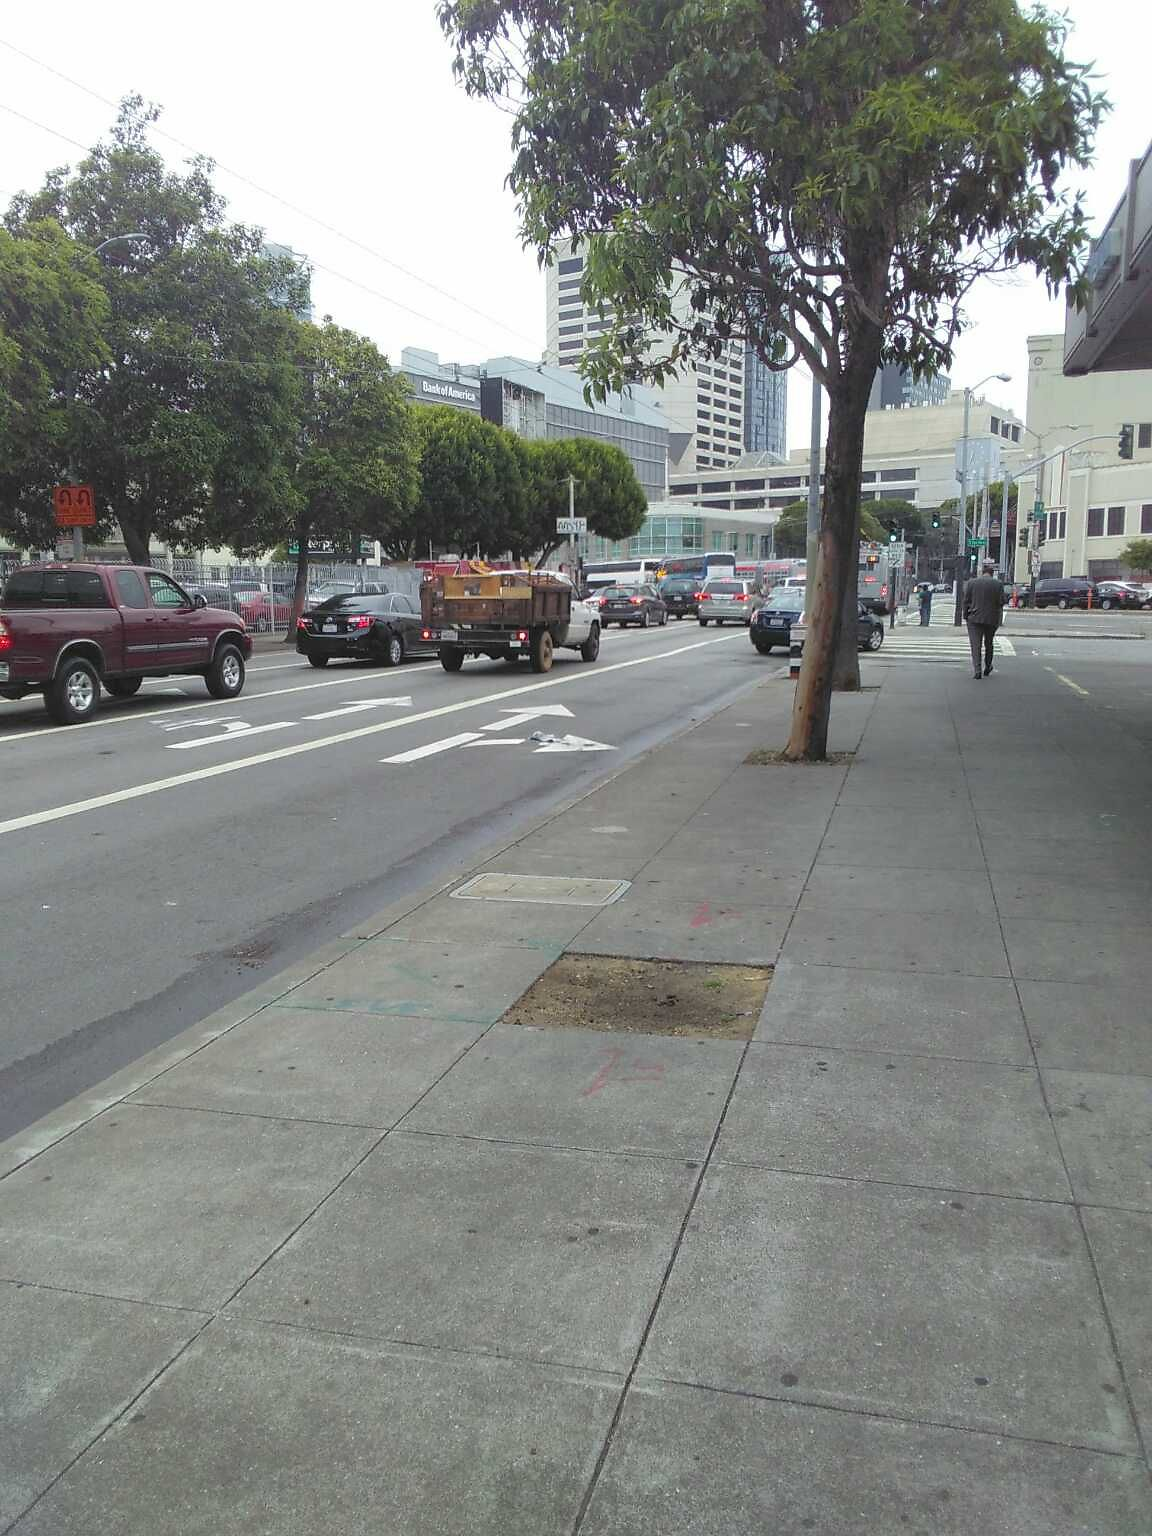

2016-11-14T23:53:11.000


KeyError: ignored

In [13]:
servicename="Tree Maintenance"
servicesubtype="Tree"
#latlong = "37.752326,-122.41732"
latlong = "37.772286, -122.418892"

#latlong_19th&mission =  37.760352322983, -122.419359315196
query = """
SELECT  
    
    media_url, requested_datetime, service_request_id

    
WHERE
    service_name = "{0}"
    AND
    starts_with(service_subtype, "{1}")
    AND
    within_circle(point,{2}, 40)
    AND
    requested_datetime > "2013-06-15"
    
  
ORDER BY
    requested_datetime DESC
    
    
LIMIT
    20


    

"""


query = (query.format(servicename,servicesubtype,latlong))
# print(newquery)
results = client.get(socrata_dataset_identifier, query=query)
for result in results:
  print(result['requested_datetime'])
  display(Image(result['media_url'], width=250))
  result['requested_datetime']
#   print (service_request_id)
#   print ("--"*20)
  #pass
  
 
  
  


In [5]:

df=pd.DataFrame.from_records(results)
df=df.iloc[1:]
df.head(2)


,media_url,requested_datetime
1,http://mobile311.sfgov.org/media/san_francisco...,2018-01-17T15:52:00.000
2,http://mobile311.sfgov.org/media/san_francisco...,2018-01-17T15:35:00.000


In [0]:

df.to_csv('search-results.csv', index=False)
!gsutil cp search-results.csv gs://warmhats2018/monthly.csv

Copying file://search-results.csv [Content-Type=text/csv]...
/ [1 files][  360.0 B/  360.0 B]                                                
Operation completed over 1 objects/360.0 B.                                      


In [0]:
!gcloud config set project chromebookpython

Updated property [core/project].


In [0]:
# !pip install --upgrade -q gspread
# !pip install gspread_dataframe as gd

  Could not find a version that satisfies the requirement as (from versions: )
No matching distribution found for as


In [0]:
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# import gspread_dataframe as gd
# from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# = gc.create('A new spreadsheet')

# Open our new sheet.
ws = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gM2i6NR-38KEa8cWnExMXS5YXj4__WUpbkuD2vVCMvw/edit#gid=0').sheet1

gd.set_with_dataframe(ws,df)

# Append some data
#existing = gd.get_as_dataframe(ws)
#updated = existing.append(df)
#gd.set_with_dataframe(ws, updated)


# # Go to https://sheets.google.com to see your new spreadsheet.